Домашнее задание к лекции «Задачи классификации и кластеризации»

Задание.

+Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
+Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
+Разделите данные на выборку для обучения и тестирования
+Постройте модель LDA
+Визуализируйте предсказания для тестовой выборки и центры классов
-Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
-Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

#from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
r = pd.DataFrame(iris.data, columns=iris.feature_names)
data = r[['sepal length (cm)', 'sepal width (cm)']]

print(data.head())
print()
variety = iris.target
print(variety, type(variety))



   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Визуализация исходных точек по признакам длины и ширины чашелистиков')

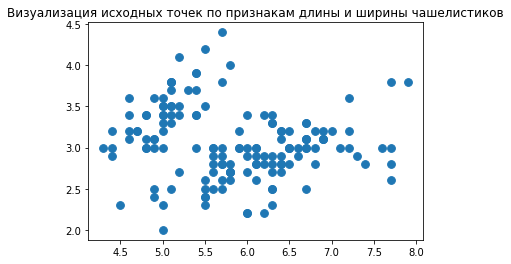

In [12]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', s=60)
plt.title('Визуализация исходных точек по признакам длины и ширины чашелистиков')

In [3]:
#Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.3)

In [4]:
#Постройте модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [5]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
lda.predict(X_test)

array([1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2])

In [7]:
y_test

array([2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1,
       1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2])

In [8]:
res = pd.DataFrame([y_test, lda.predict(X_test)])#.T
res

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,2,0,2,0,1,1,2,0,2,2,...,2,0,0,2,0,2,0,2,0,2
1,1,0,2,0,2,2,1,0,2,1,...,2,0,0,2,0,2,0,2,0,2


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7333333333333333

In [14]:
lda.means_ #---центроиды

array([[5.046875  , 3.45625   ],
       [5.88378378, 2.78108108],
       [6.62222222, 2.96944444]])

In [10]:
lda.coef_

array([[-6.96276869,  9.23573989],
       [ 1.32998271, -3.45675168],
       [ 4.82220105, -4.65677401]])

Text(0.5, 1.0, 'Визуализация тестовых точек по признакам длины и ширины чашелистиков')

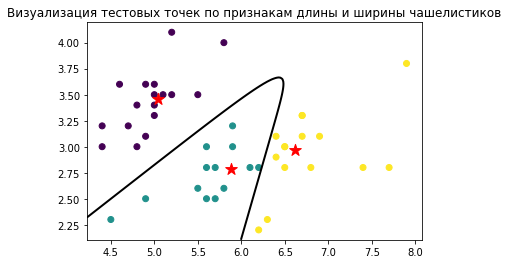

In [41]:
from matplotlib import colors
# Визуализация для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# Центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

#Делаем сетку
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

#пердсказываем класс
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')
plt.title('Визуализация тестовых точек по признакам длины и ширины чашелистиков')

Text(0.5, 1.0, 'Визуализация тренировочных точек по признакам длины и ширины чашелистиков')

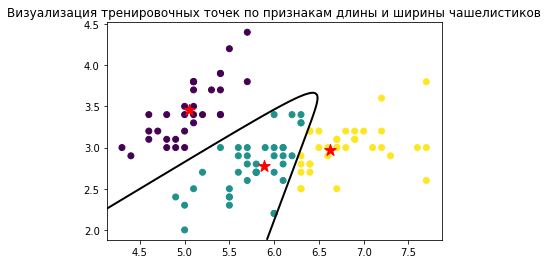

In [40]:
# Визуализация для тренировочной выборки
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=lda.predict(X_train))
# Центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

#Делаем сетку
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

#пердсказываем класс
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')
plt.title('Визуализация тренировочных точек по признакам длины и ширины чашелистиков')

In [46]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
# Импортируем метод К-средних
from sklearn.cluster import KMeans

In [57]:
scaled = StandardScaler()

In [58]:
# Сразу обучаем и преобразываем данные - обучаем на тренировочных данных
X_scaled = scaled.fit_transform(X_train)

In [88]:
# явно указываем количество кластеров (указан итоговый - выбранный визуально по графику локтя)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1,
       2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0])

# ks = range(1, 20) 
Если я использую этот диапазон у меня вылетает ошибка ('NoneType' object has no attribute 'split')
поэтому я сразу начал перебирать с 2х класстеров

In [83]:
#Находим оптимальное кол-во кластеров
k_inertia = [] # создаем список для инерции
ks = range(1, 20) #Задаем диапазон кластеров  

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(list(X_scaled))
    k_inertia.append(clf_kmeans.inertia_) # добавляем инерцию каждой модели в список

AttributeError: 'NoneType' object has no attribute 'split'

In [84]:
#Находим оптимальное кол-во кластеров
k_inertia = [] # создаем список для инерции
ks = range(2, 20) #Задаем диапазон кластеровv 

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_) # добавляем инерцию каждой модели в список
    
    K = range(2,10)


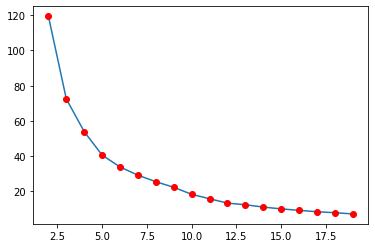

In [85]:
# Строим график локтя, чтобы визуально определить оптимальное кол-во кластеров
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

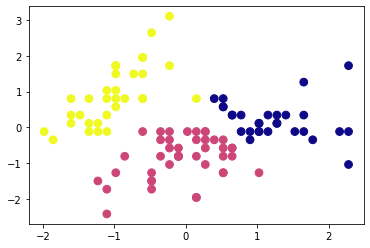

In [89]:
# Визуализация полученной кластеризации методом K-средних
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='plasma', c=clusters, s=60)